## Seaborn

Seaborn is a built-in data visualization library, on top of Matplotlib library with additional functionalities for easier readability and better visual aesthetics.

Refer to the following link for the documentation of Seaborn library: https://seaborn.pydata.org/api.html

Note that saving Seaborn plots require the use of Matplotlib library's savefig() function (explained in Matplotlib notebook).

In [1]:
# Importing seaborn, matplotlib and numpy library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading existing dataset from seaborn
dataset = sns.load_dataset('diamonds')

# Setting theme of seaborn plots for current notebook
sns.set_theme(font_scale = 1.1, style='white')

Refer to the following link for list of datasets from Seaborn: https://github.com/mwaskom/seaborn-data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


### Correlation heatmaps

Heatmaps are useful to plot rectangular data as a color-coded matrix, especially useful for displaying correlation between numerical variables in a dataframe.

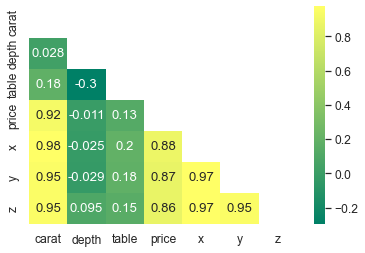

In [4]:
# Correlation heatmap
correlation = dataset.corr()
sns.heatmap(correlation, annot=True, mask = np.triu(np.ones_like(correlation, dtype=bool)), cmap="summer")
plt.show()

### Joint plots

Joint plots are used to plot relationship between two numerical variables using both bivariate and univariate graphs.

Joint plots in Seaborn accept 6 kinds:
1. kde
2. reg
3. hist
4. scatter
5. hex
6. resid

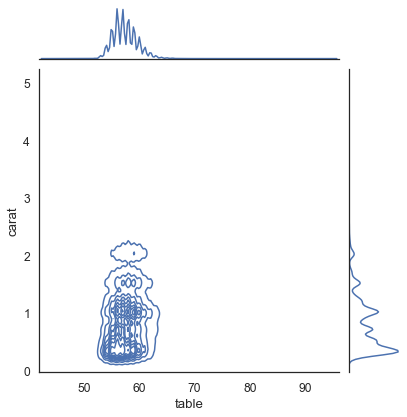

In [5]:
# Joint plot with kde type
sns.jointplot(x = 'table', y = 'carat', data=dataset, kind="kde")
plt.show()

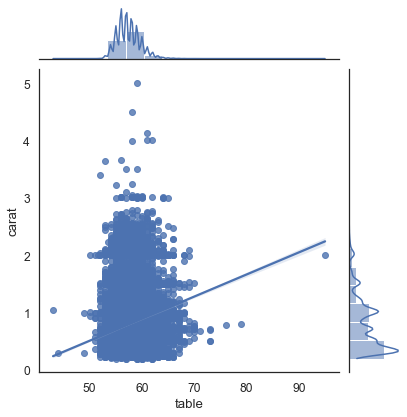

In [6]:
# Joint plot with reg type
sns.jointplot(x = 'table', y = 'carat', data=dataset, kind="reg", marginal_kws=dict(bins=15))
plt.show()

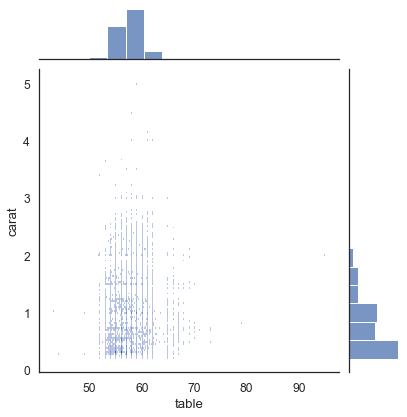

In [7]:
# Joint plot with hist type
sns.jointplot(x = 'table', y = 'carat', data=dataset, kind="hist", marginal_kws=dict(bins=15))
plt.show()

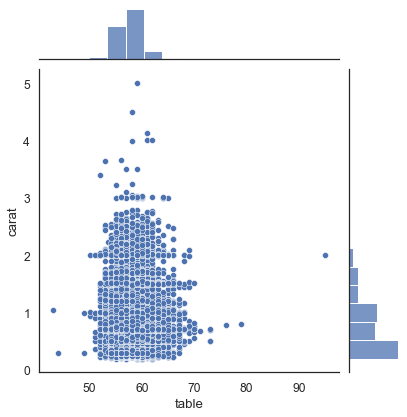

In [8]:
# Joint plot with scatter type
sns.jointplot(x = 'table', y = 'carat', data=dataset, kind="scatter", marginal_kws=dict(bins=15))
plt.show()

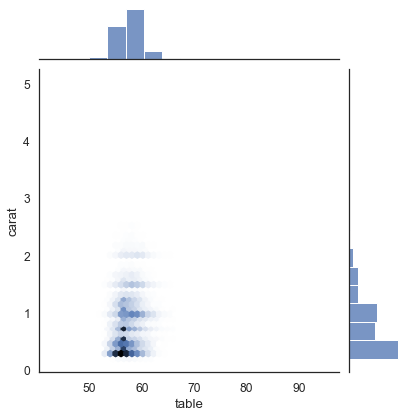

In [9]:
# Joint plot with hex type
sns.jointplot(x = 'table', y = 'carat', data=dataset, kind="hex", marginal_kws=dict(bins=15))
plt.show()

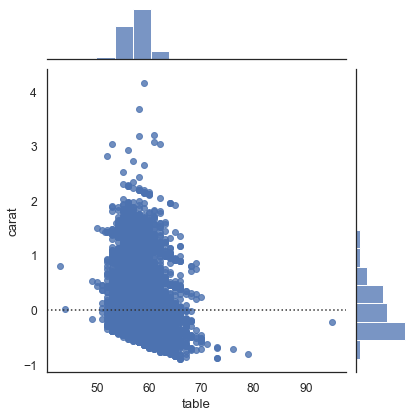

In [10]:
# Joint plot with resid type
sns.jointplot(x = 'table', y = 'carat', data=dataset, kind="resid", marginal_kws=dict(bins=15))
plt.show()

### Pair plots

Pair plots are used to plot pair-wise relationships between all numerical variables in a dataset.

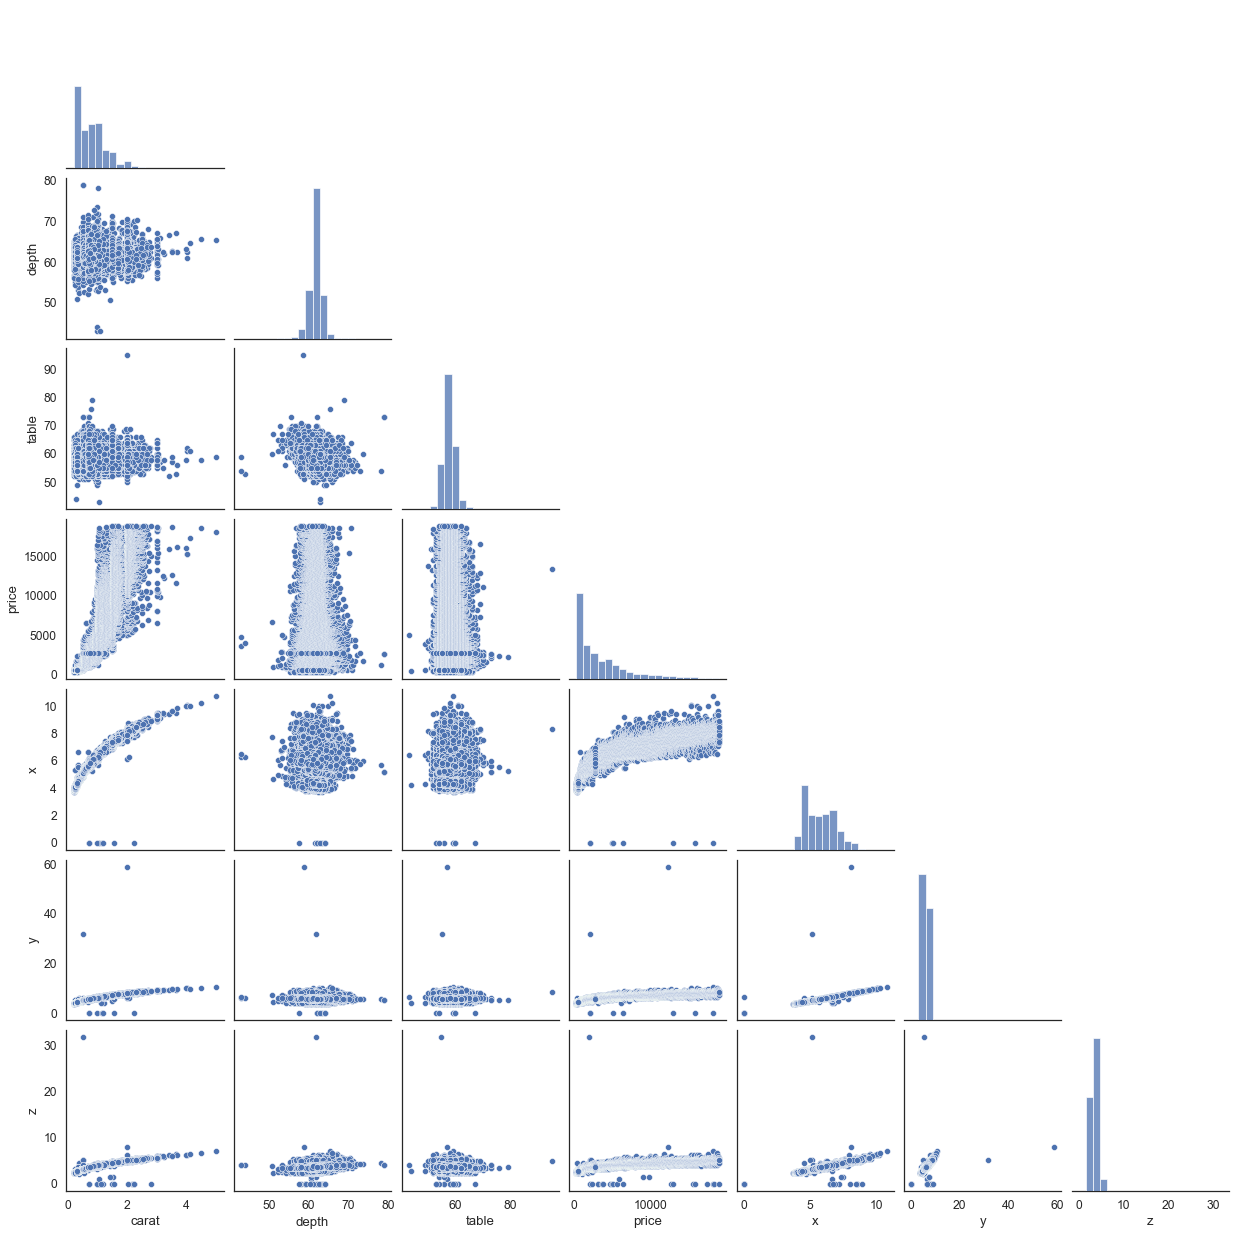

In [11]:
sns.pairplot(dataset, corner=True, diag_kws=dict(bins=20))
plt.show()

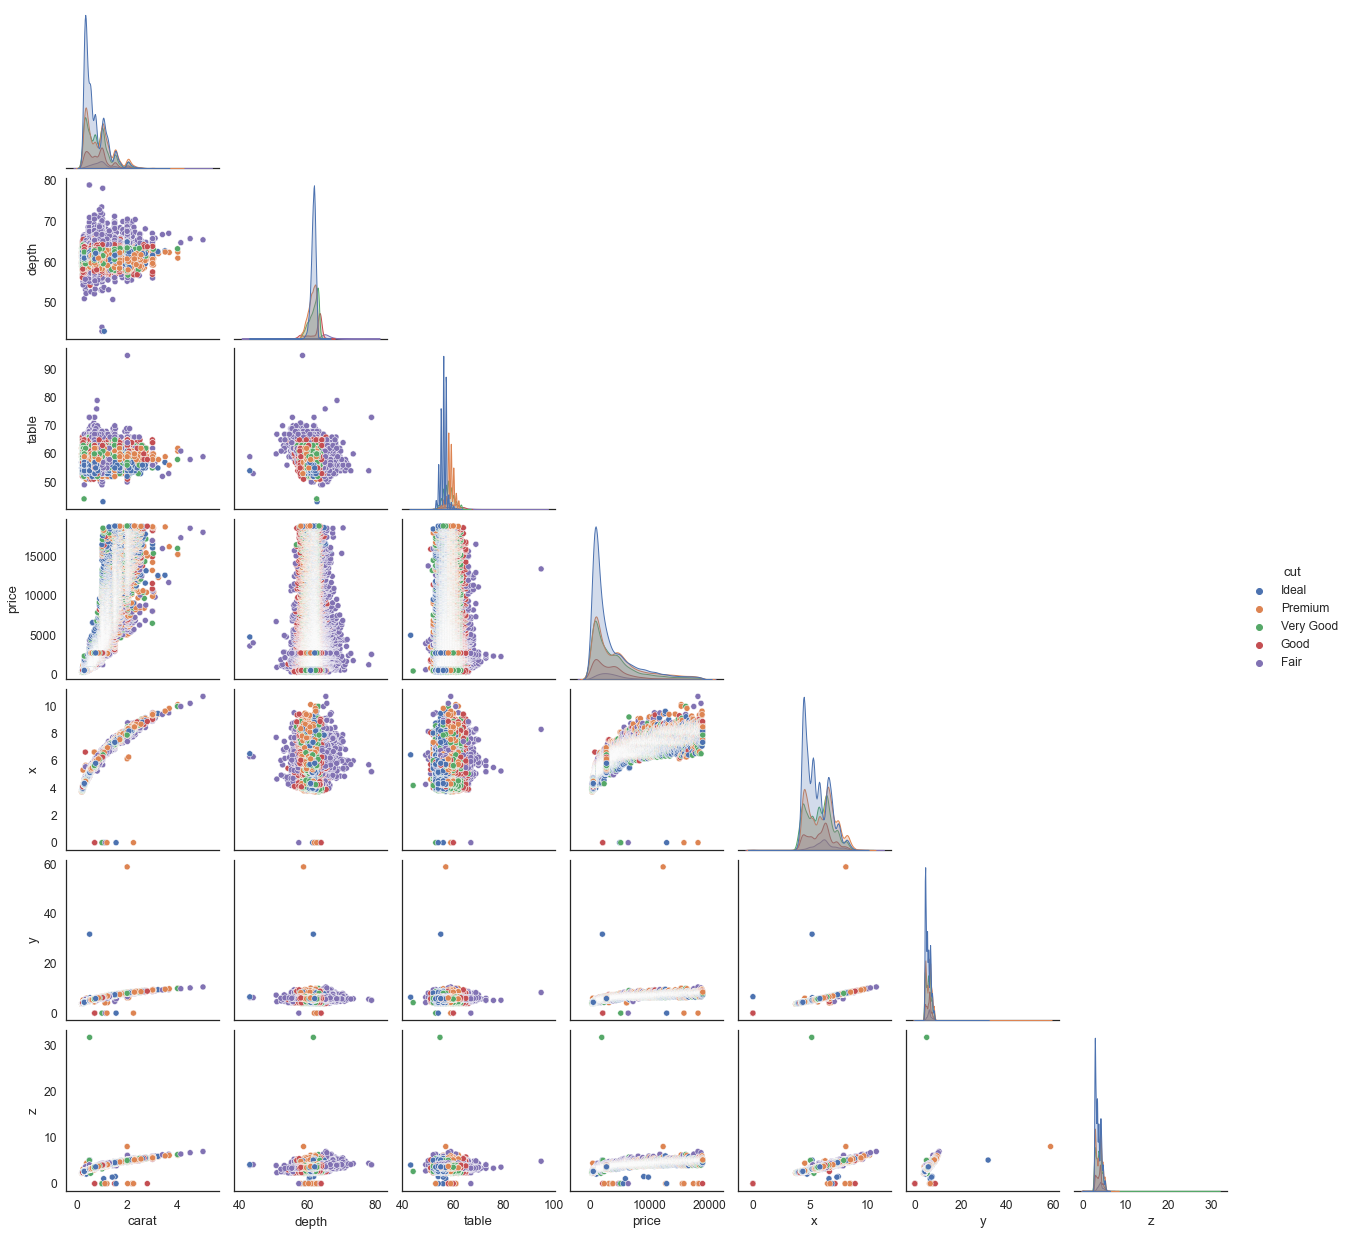

In [12]:
sns.pairplot(dataset, corner=True, hue='cut')
plt.show()

### Distribution plots

Distribution plots are used to plot either univariate or bivariate distribution of data across individual or multiple subplots (Facet-grid)

Distribution plots in Seaborn accept 3 kinds:
1. hist
2. kde
3. ecdf

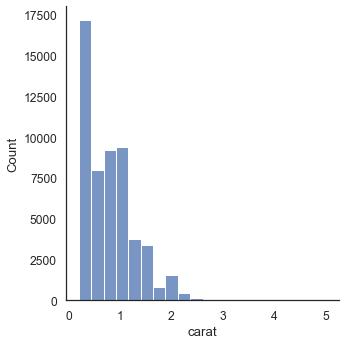

In [13]:
# Distribution plot with "hist" type
sns.displot(x='carat', data=dataset, bins=20,kind='hist')
plt.show()

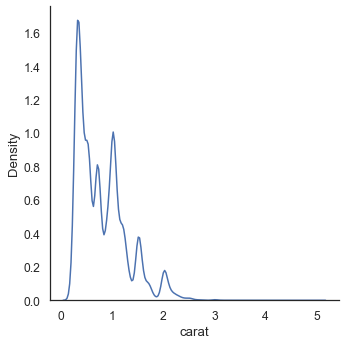

In [14]:
# Distribution plot with "kde" type
sns.displot(x='carat', data=dataset, kind='kde')
plt.show()

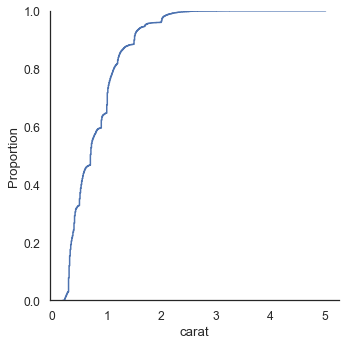

In [15]:
# Distribution plot with "ecdf" type
sns.displot(x='carat', data=dataset, kind='ecdf')
plt.show()

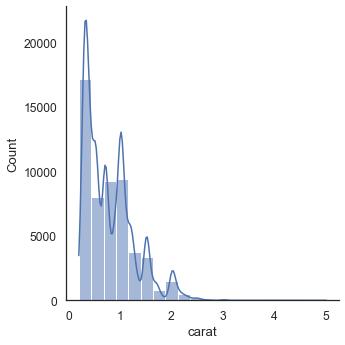

In [16]:
# Distribution plot with "kde" and "hist" type overlap
sns.displot(x='carat', data=dataset, bins=20,kind='hist',kde=True)
plt.show()

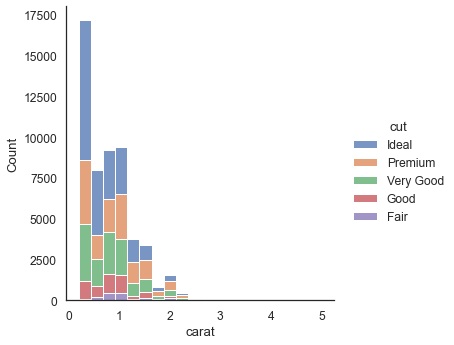

In [17]:
# Distribution plot with "hist" type stacked based on hue argument
sns.displot(x='carat', data=dataset, bins=20,kind='hist',kde=False, hue='cut', multiple='stack')
plt.show()

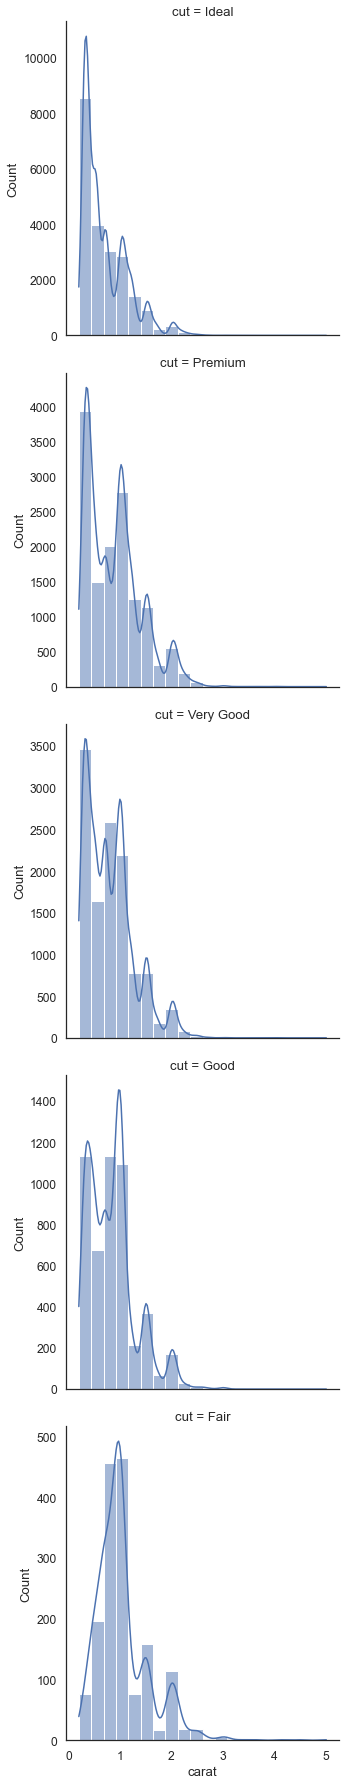

In [18]:
# Facet grids for distribution plots
sns.displot(x='carat', data=dataset, bins=20,kind='hist',kde=True, row='cut', facet_kws=dict(sharey = False))
plt.show()

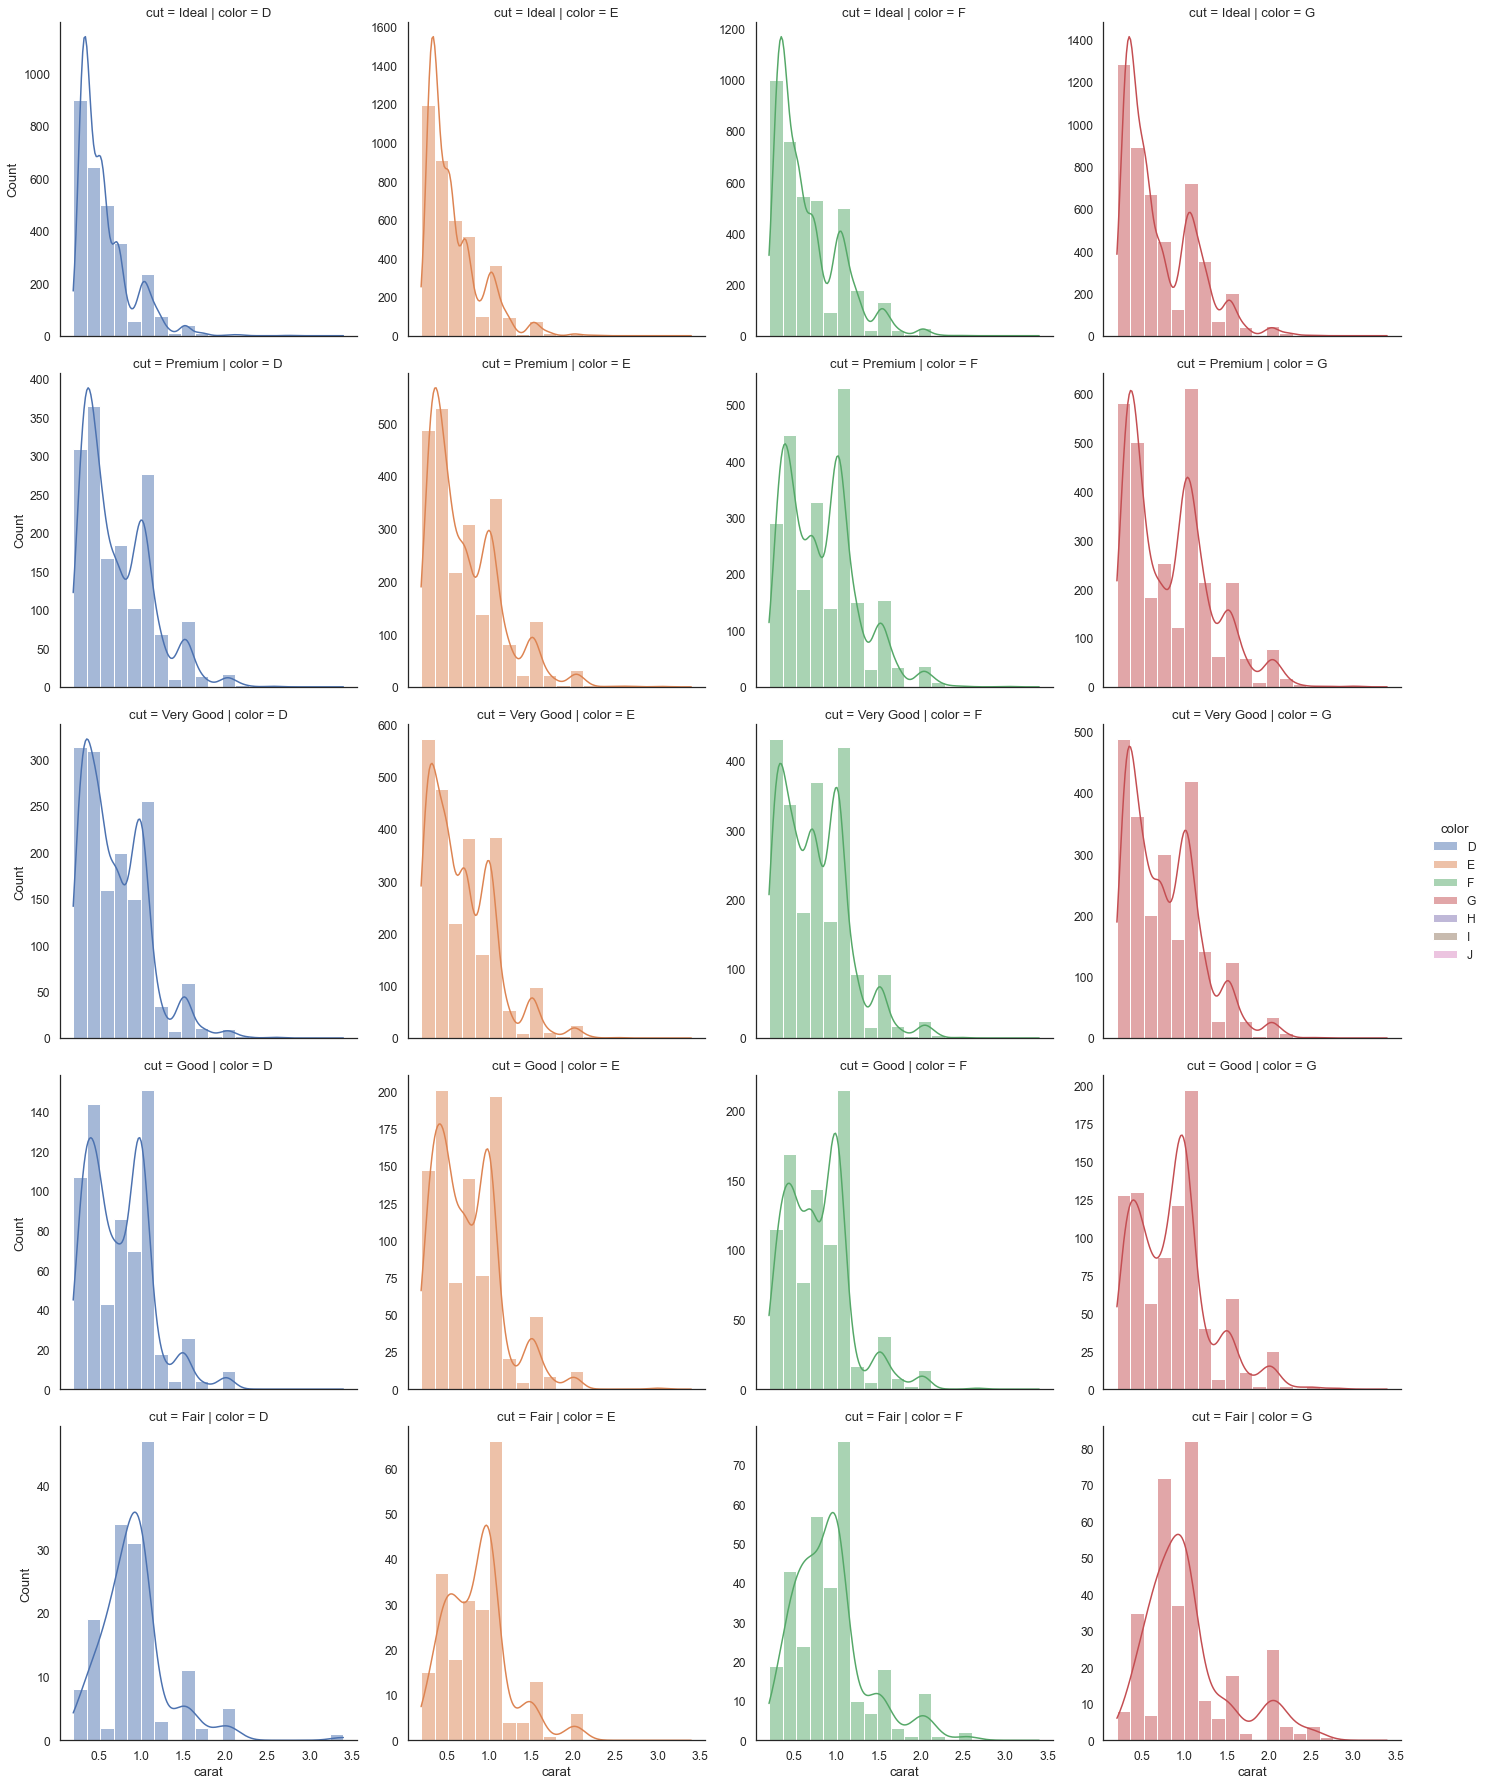

In [19]:
# Facet grids for distribution plots
sns.displot(x='carat', data=dataset[dataset['color'].isin(['D','E','F','G'])], bins=20,kind='hist',kde=True, row='cut', col='color', hue='color', col_order=['D','E','F','G'], facet_kws=dict(sharey = False))
plt.show()

### Relational plots

Relational plots are used to plot bivariate relationship of data across individual or multiple subplots (Facet-grid)

Relational plots in seaborn accept 2 kinds:
1. scatter
2. line

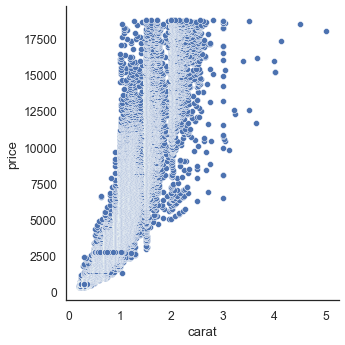

In [20]:
# Relational plot with "scatter" type
sns.relplot(x='carat',y='price',data=dataset, kind='scatter')
plt.show()

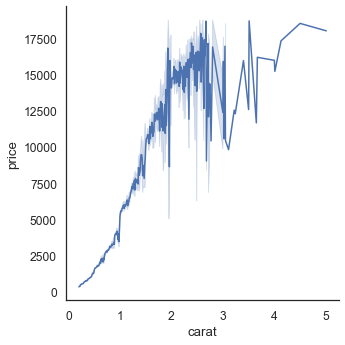

In [21]:
# Relational plot with "line" type
sns.relplot(x='carat',y='price',data=dataset, kind='line')
plt.show()

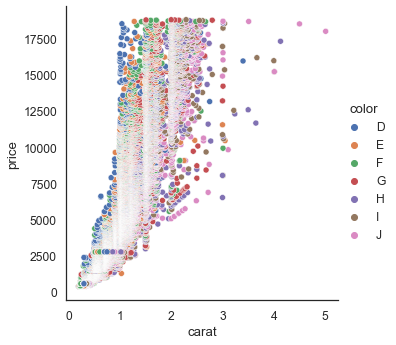

In [22]:
# Distribution plot with "scatter" type and hue argument
sns.relplot(x='carat',y='price',data=dataset, kind='scatter', hue='color')
plt.show()

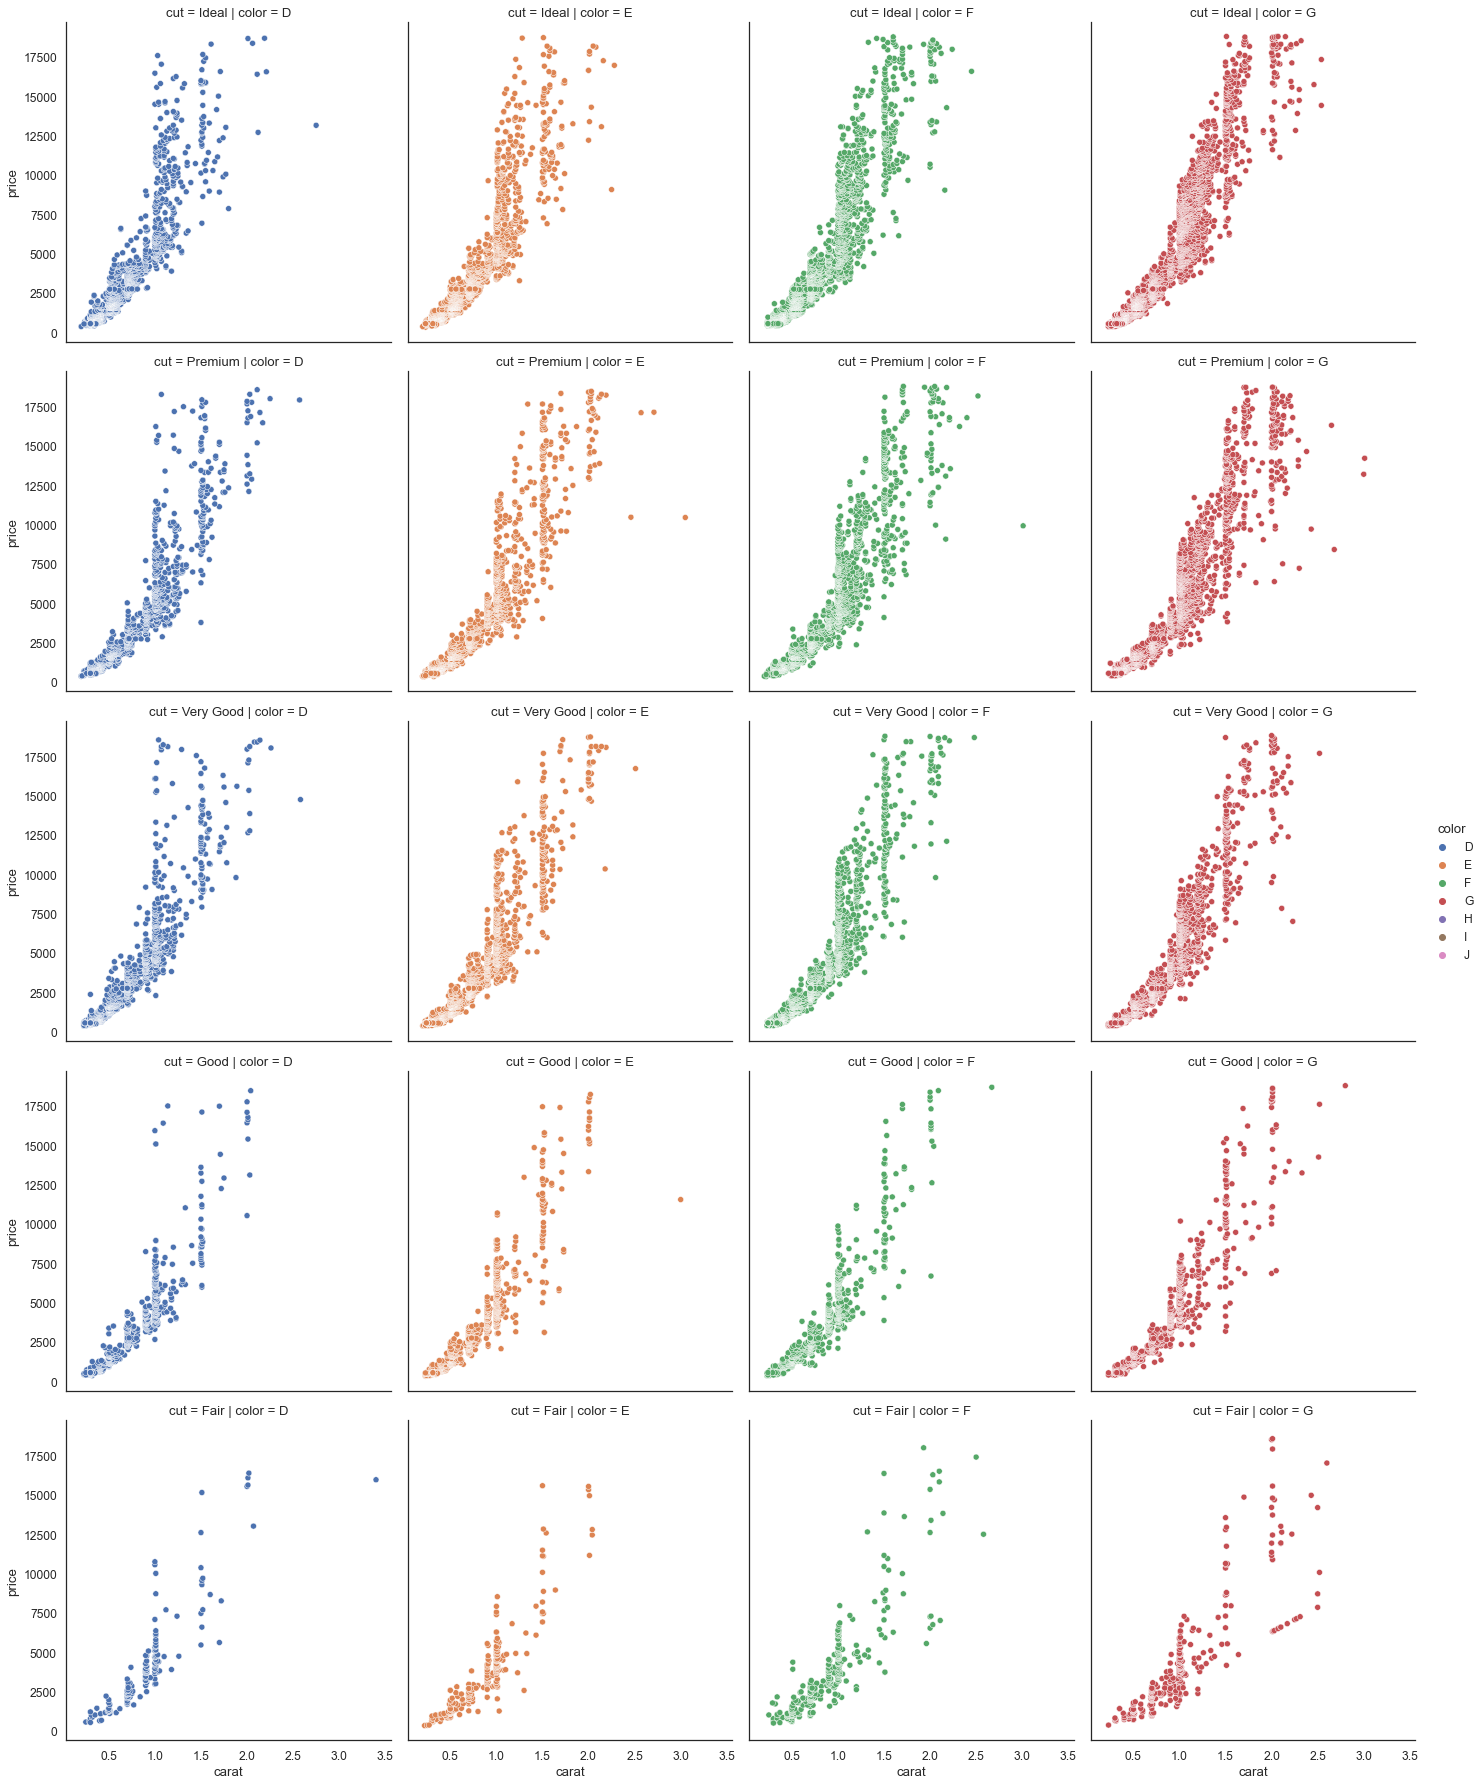

In [23]:
# Facet grids for relational plots
sns.relplot(x='carat',y='price',data=dataset[dataset['color'].isin(['D','E','F','G'])], kind='scatter', hue='color', col='color', row='cut', col_order=['D','E','F','G'])
plt.show()

### Regression model plots

Regression model plots are used to plot data and regression model fits across individual or multiple subplots (Facet-grid).

In addition, there is also residual plots available in Seaborn, which is used to plot residuals from regression model.

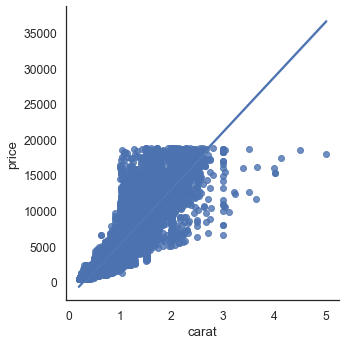

In [24]:
# Regression model plot
sns.lmplot(x='carat',y='price',data=dataset)
plt.show()

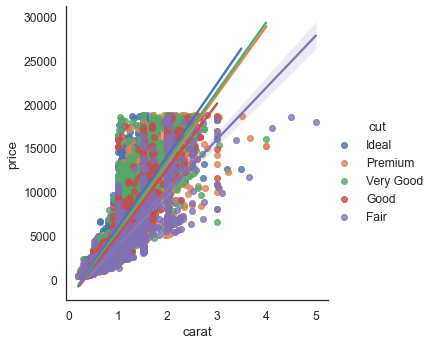

In [25]:
# Regression model plot across multiple categories
sns.lmplot(x='carat',y='price',data=dataset, hue='cut')
plt.show()

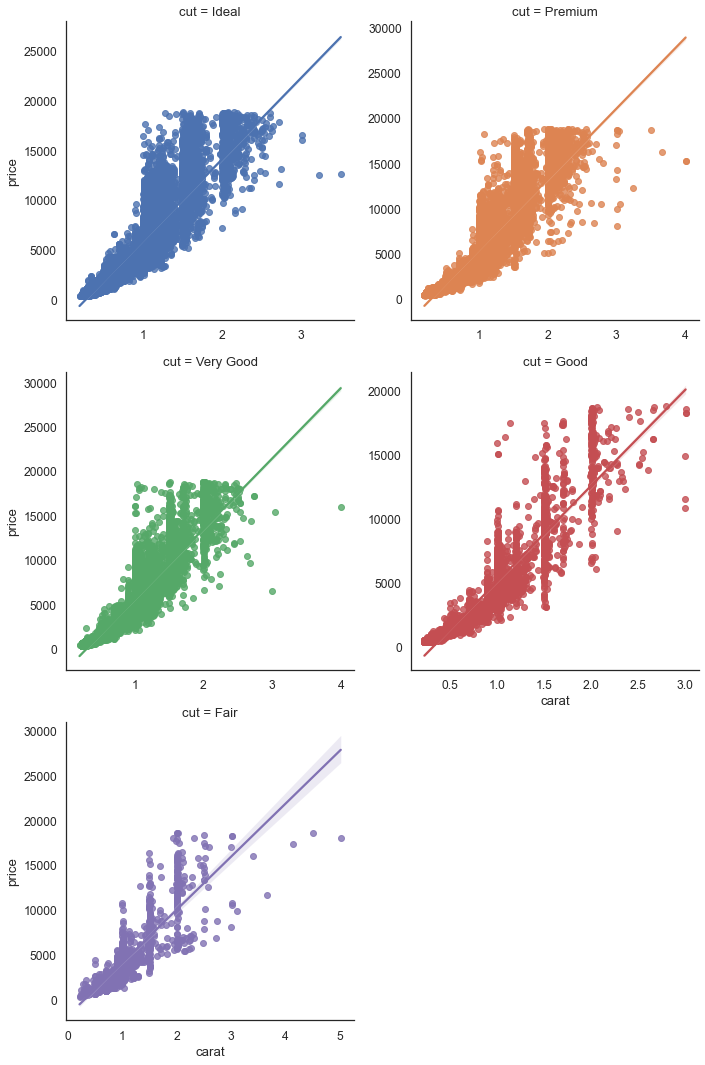

In [26]:
# Facet grid for regression model plot
sns.lmplot(x='carat',y='price',data=dataset, col='cut', col_wrap=2, hue='cut', facet_kws=dict(sharex=False, sharey=False))
plt.show()

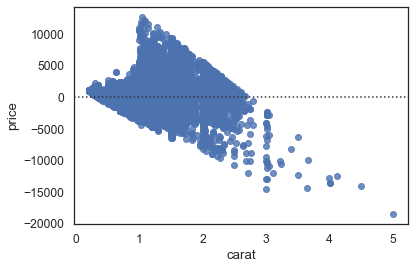

In [27]:
# Residual plot
sns.residplot(x='carat',y='price',data=dataset)
plt.show()

### Categorical plots

Categorical plots are used to represent relationship between a numerical and one or more categorical variables

There are three different types of categorical plots with its various kinds:
1. Categorical scatterplots
- strip (stripplot)
- swarm (swarmplot)

2. Categorical distribution plots
- box (boxplot)
- violin (violinplot)
- boxen (boxenplot)

3. Categorical estimate plots
- point (pointplot)
- bar (barplot)
- count (countplot)

Note that categorical plots in Seaborn have different keyword arguments for different kinds. Refer to the official documentation for more details of available keyword arguments for different kinds of categorical plots.

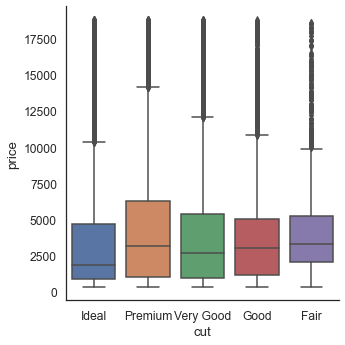

In [28]:
# Categorical plot with "box" type
sns.catplot(x='cut',y='price', data=dataset,kind='box')
plt.show()

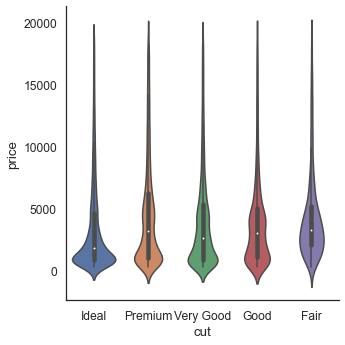

In [29]:
# Categorical plot with "violin" type
sns.catplot(x='cut',y='price', data=dataset,kind='violin')
plt.show()

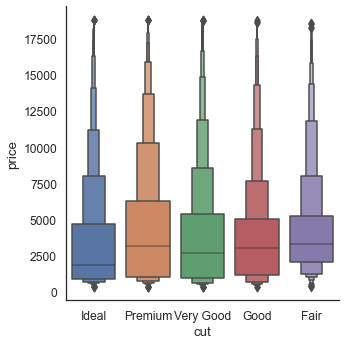

In [30]:
# Categorical plot with "boxen" type
sns.catplot(x='cut',y='price', data=dataset,kind='boxen')
plt.show()

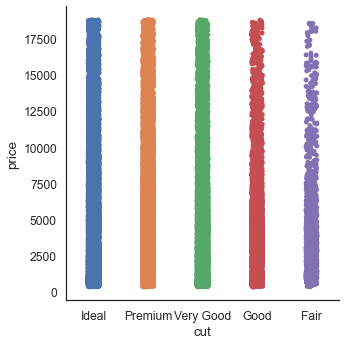

In [31]:
# Categorical plot with "strip" type
sns.catplot(x='cut',y='price', data=dataset,kind='strip')
plt.show()

C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


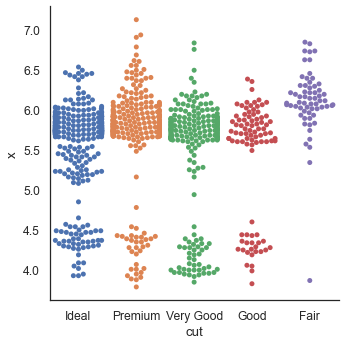

In [32]:
# Categorical plot with "swarm" type
sns.catplot(x='cut',y='x', data=dataset[0:1000],kind='swarm')
plt.show()

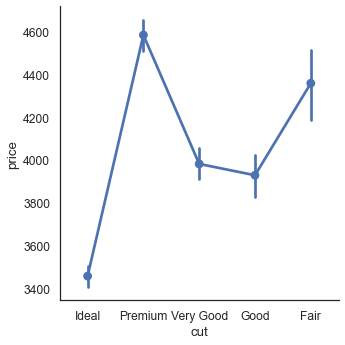

In [33]:
# Categorical plot with "point" type
sns.catplot(x='cut',y='price', data=dataset,kind='point')
plt.show()

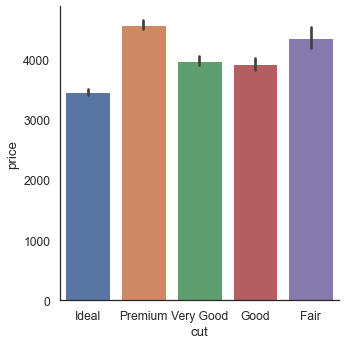

In [34]:
# Categorical plot with "bar" type
sns.catplot(x='cut',y='price', data=dataset,kind='bar')
plt.show()

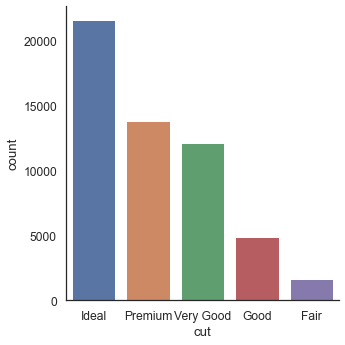

In [35]:
# Categorical plot with "count" type
sns.catplot(x='cut', data=dataset,kind='count')
plt.show()

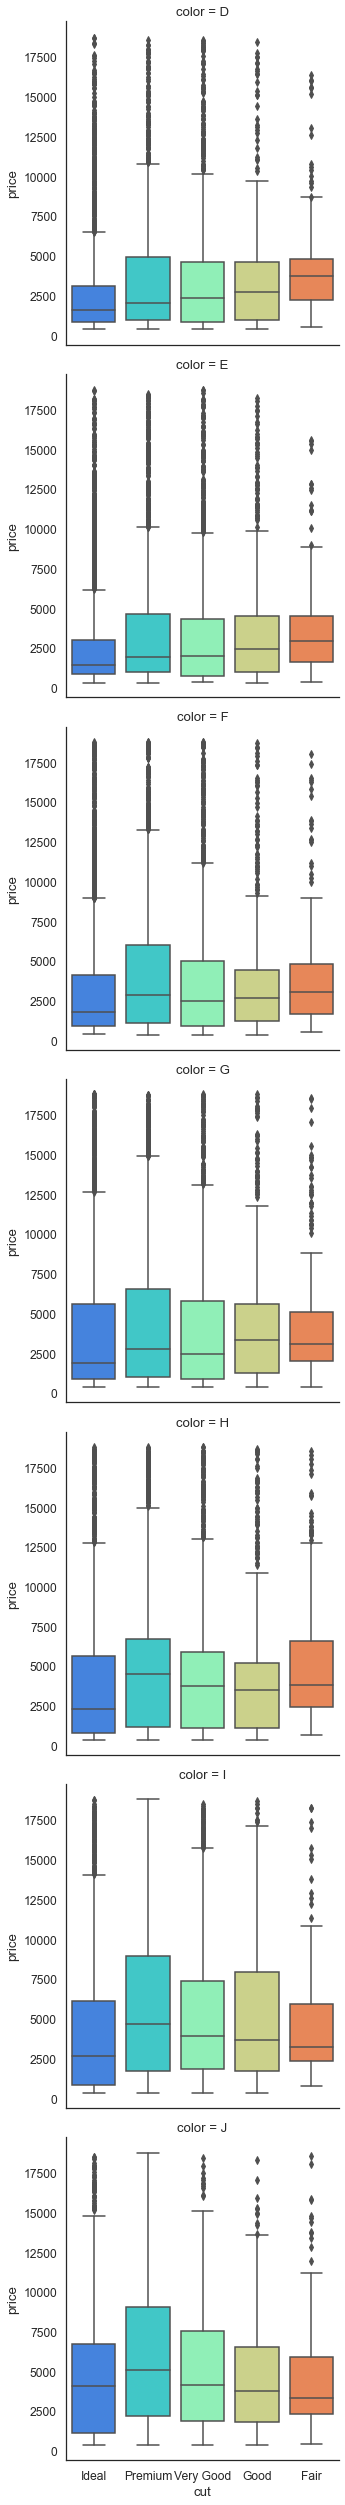

In [36]:
# Facet grid for categorical plots
sns.catplot(x='cut',y='price', data=dataset,kind='box',row="color",palette='rainbow')
plt.show()